In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

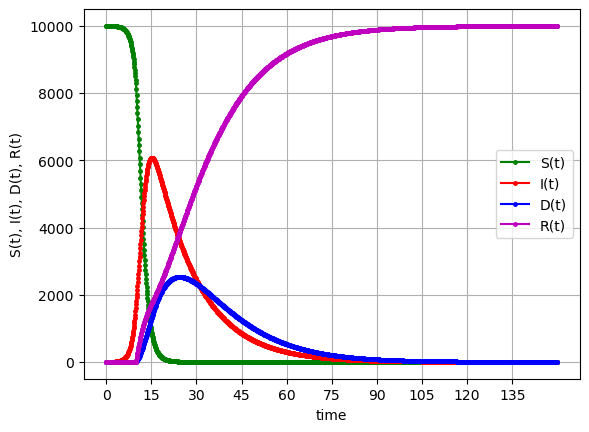

In [9]:
def kernel(h, beta, delta, mu, t_bound, t_total, S0, I0, D0, R0, dt):
    
    global Beta, Delta, Mu
    
    Beta, Delta, Mu = beta, delta, mu
    vec = np.array([S0, I0, D0, R0])
    steps = int(t_total / dt)
    solution = np.zeros((steps, len(vec)))
    solution[0, :] = vec
    t = np.arange(0, t_total, dt)
    flag = t >= t_bound

    for i in range(1, steps):
        vec = vec + dt * f(vec, flag[i])
        solution[i, :] = vec

    plot(h, t, solution)
    Data = np.column_stack((t, solution))  
    
def f(vec, flag):
    global Beta, Delta, Mu
    return np.array([
        vec[0] * (-Beta * vec[1] - Mu * flag),
        vec[1] * (Beta * vec[0] - Mu * flag),
        (Mu * vec[1] - Delta * vec[2]) * flag,
        (Delta * vec[2] + Mu * vec[0]) * flag
    ])
def plot(h, t, solution):
    s = ['g.-', 'r.-', 'b.-', 'm.-']
    labels = ['S(t)', 'I(t)', 'D(t)', 'R(t)']

    for i in range(len(s)):
        plt.plot(t, solution[:, i], s[i], markersize=5)
    
    plt.legend(labels)
    plt.xlabel('time')
    plt.ylabel('S(t), I(t), D(t), R(t)')
    plt.xticks(t[::len(t) // 10])
    plt.grid(True)
#     plt.show()

h = plt.subplot()
kernel(h, beta=8e-5, delta=0.1, mu=7e-2,
       t_bound=10, t_total=150,
       S0=9999, I0=1,
       D0=0, R0=0, dt=0.1)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def AlgoStochPSIDR(h, t_bound, MaxTime, I0, D0, R0):
    global m, n, Beta, Mu, Delta
    M, N = m, n
    status_old = np.zeros((M, N))

    countI = 0
    while countI < I0:
        i, j = np.random.randint(M), np.random.randint(N)
        if status_old[i, j] == 0:
            status_old[i, j] = 1
            countI += 1

    countD = 0
    while countD < D0:
        i, j = np.random.randint(M), np.random.randint(N)
        if status_old[i, j] == 0:
            status_old[i, j] = 2
            countD += 1

    countR = 0
    while countR < R0:
        i, j = np.random.randint(M), np.random.randint(N)
        if status_old[i, j] == 0:
            status_old[i, j] = 3
            countR += 1

    status_new = status_old
    T = np.zeros(MaxTime)
    S, I, D, R = np.zeros(MaxTime), np.zeros(MaxTime), np.zeros(MaxTime), np.zeros(MaxTime)
    Pic = np.ones((M, N, 3))

    for time in range(MaxTime):
        T[time] = time
        for i in range(M):
            for j in range(N):
                if status_old[i, j] == 1:
                    for i1 in range(max(0, i-1), min(M, i+2)):
                        for j1 in range(max(0, j-1), min(N, j+2)):
                            if i1 != i or j1 != j:
                                i1_adj = (i1 + M) % M  
                                j1_adj = (j1 + N) % N
                                if np.random.rand() < Beta and status_new[i1_adj, j1_adj] == 0:
                                    status_new[i1_adj, j1_adj] = 1

        if T[time] > t_bound:
            for i in range(M):
                for j in range(N):
                    if status_new[i, j] == 1 and np.random.rand() < Mu:
                        status_new[i, j] = 2
                    elif status_new[i, j] == 2 and np.random.rand() < Delta:
                        status_new[i, j] = 3
                    elif status_new[i, j] == 0 and np.random.rand() < Mu:
                        status_new[i, j] = 3

        for i in range(M):
            for j in range(N):
                if status_new[i, j] == 1:
                    Pic[i, j, :] = [1, 0, 0]
                elif status_new[i, j] == 2:
                    Pic[i, j, :] = [0, 0, 1]
                elif status_new[i, j] == 3:
                    Pic[i, j, :] = [0, 0.5, 0.5]
                else:
                    Pic[i, j, :] = [0, 1, 0]

        S[time] = np.sum(status_old == 0)
        I[time] = np.sum(status_old == 1)
        D[time] = np.sum(status_old == 2)
        R[time] = np.sum(status_old == 3)

        status_old = status_new

    h[0].clear()
    h[0].imshow(Pic)

    sol = np.column_stack((S, I, D, R))
    plotPoint(h[1], T, sol)
    plt.pause(1e-3)

def plotPoint(h, t, sol):
    s = ['g.-', 'r.-', 'b.-', 'm.-']
    labels = ['S(t)', 'I(t)', 'D(t)', 'R(t)']

    for i in range(len(s)):
        h.plot(t, sol[:, i], s[i], markersize=5)

    h.legend(labels)
    h.set_xlabel('time')
    h.set_ylabel('S(t), I(t), D(t), R(t)')
    h.set_xticks(t[::len(t) // 10])
    h.grid(True)
    plt.show()

# m, n = 100, 100
# Beta, Mu, Delta = 0.65, 0.03, 0.028
# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# AlgoStochPSIDR(axs, t_bound=20, MaxTime=300, I0=1, D0=0, R0=0)
# plt.show()

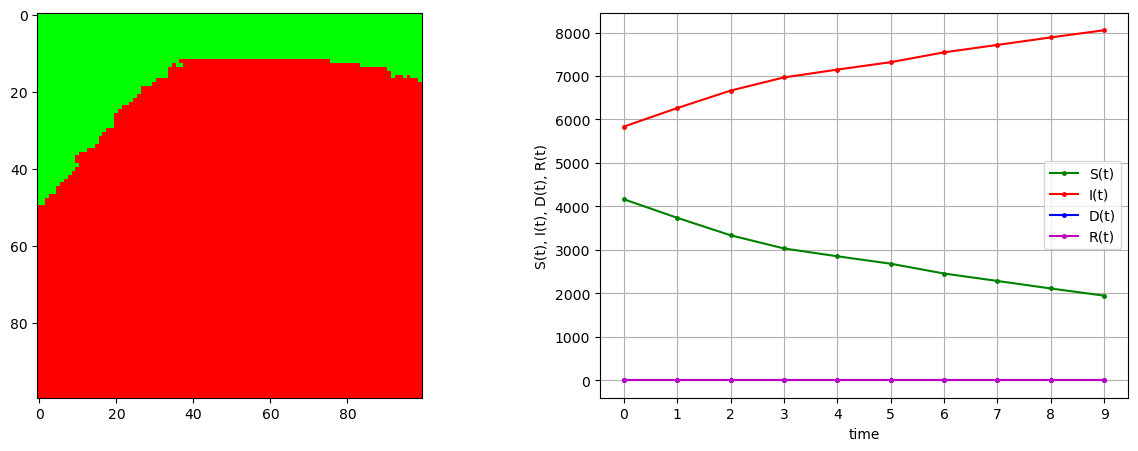

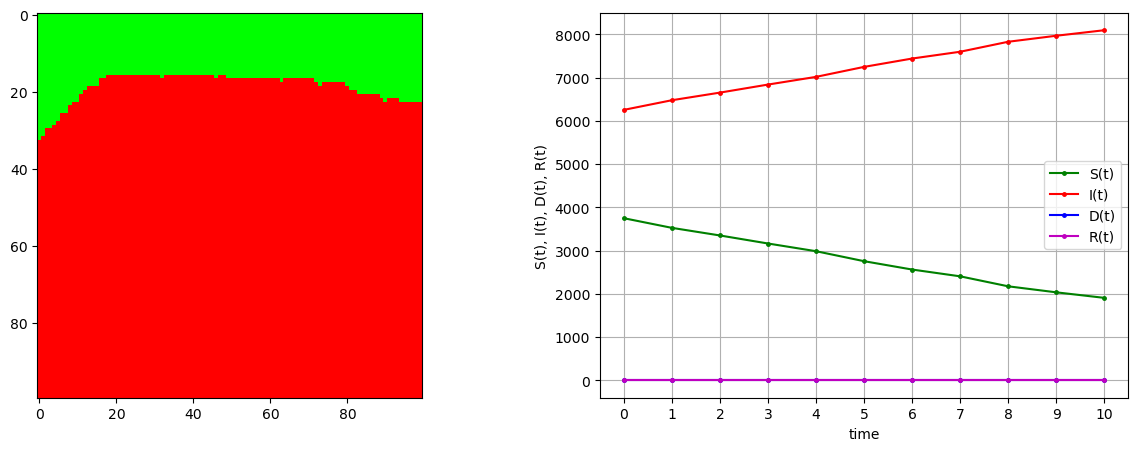

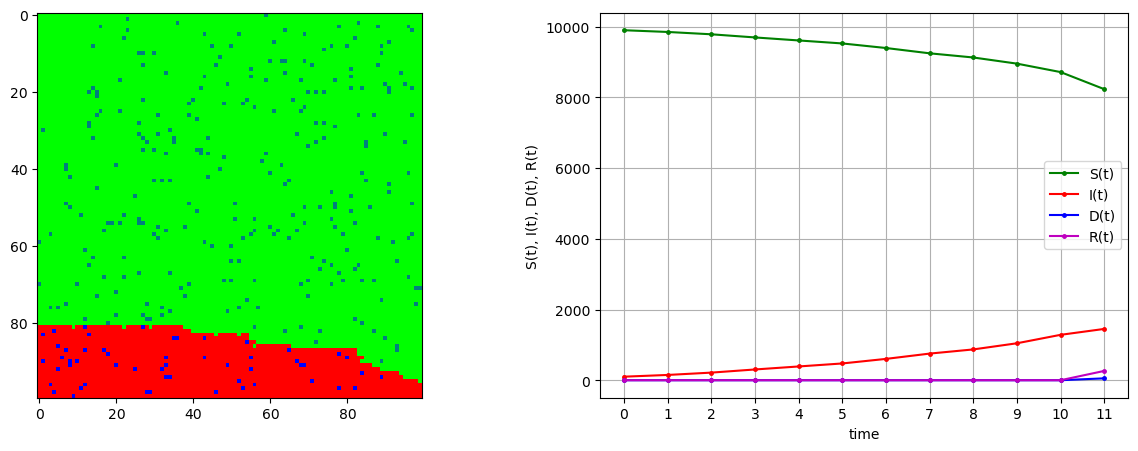

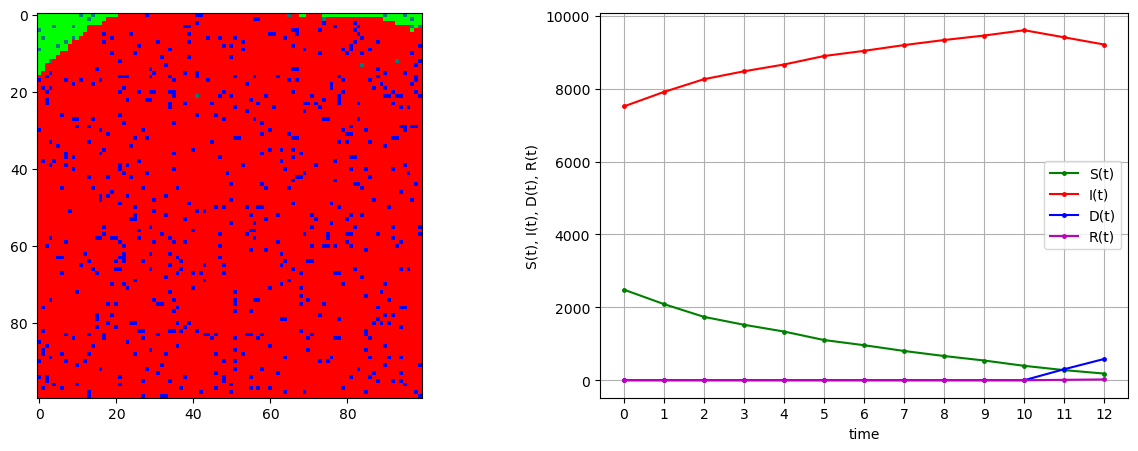

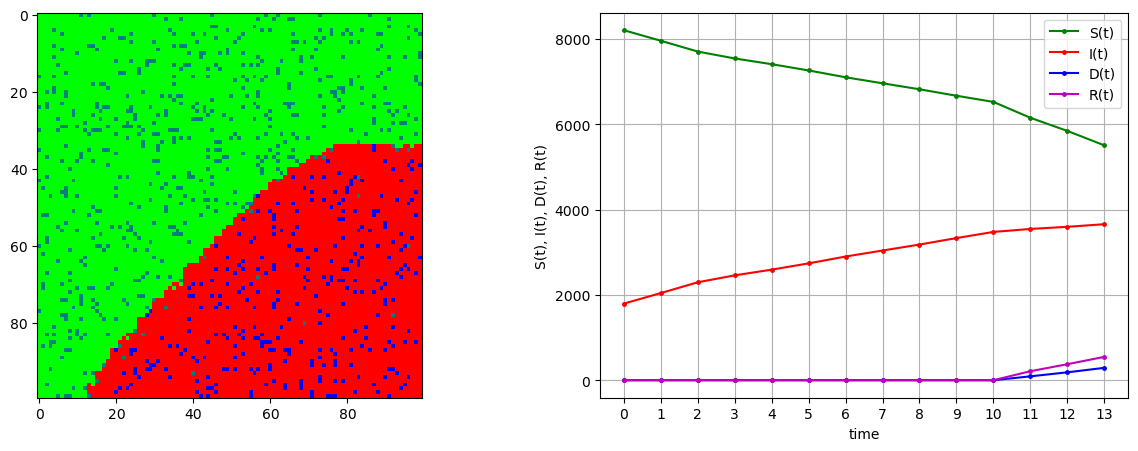

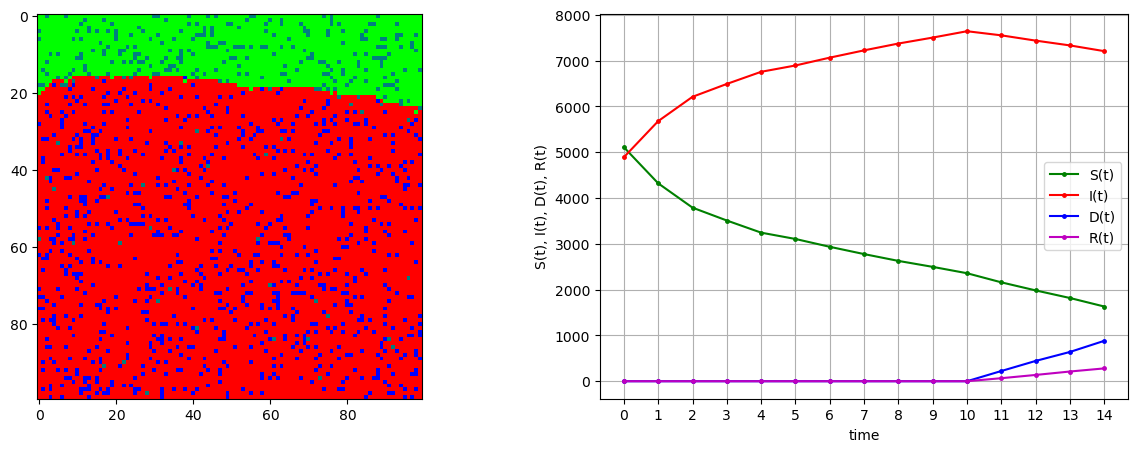

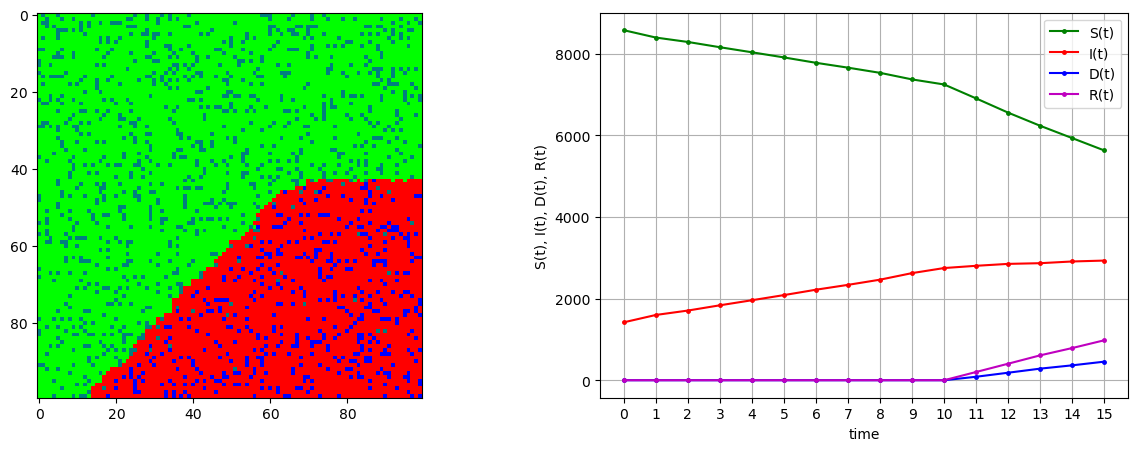

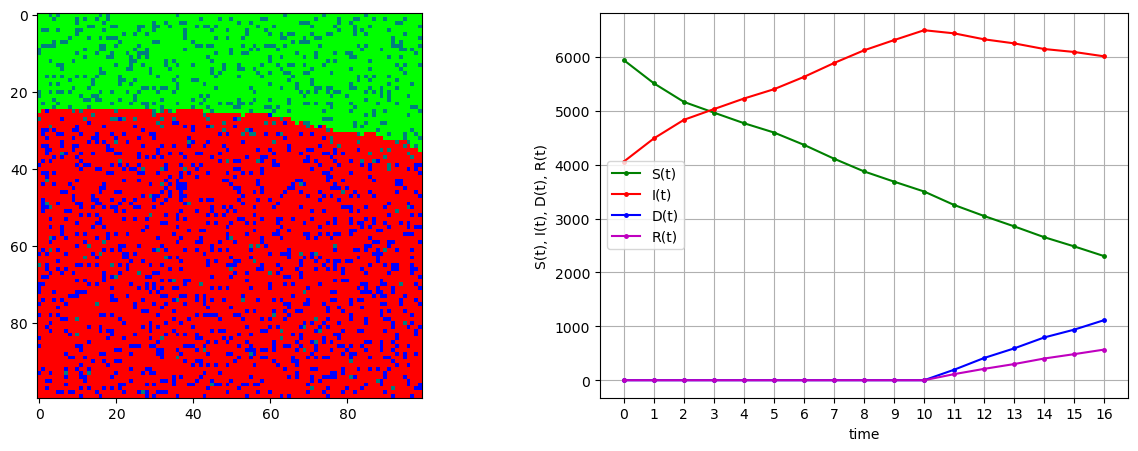

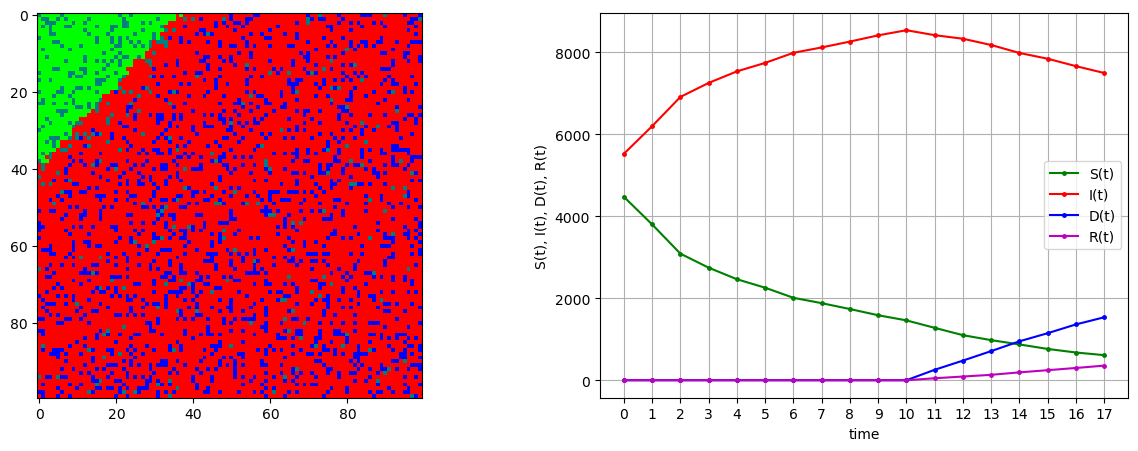

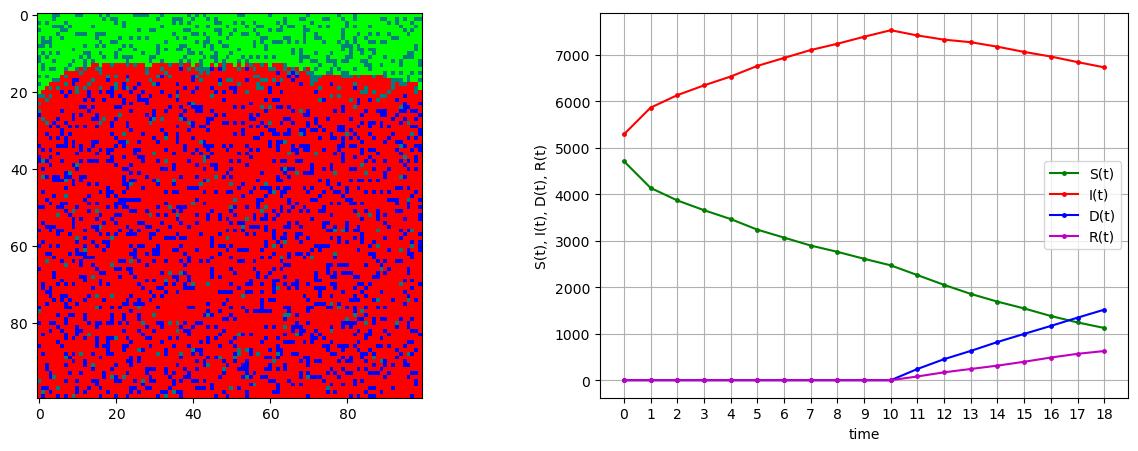

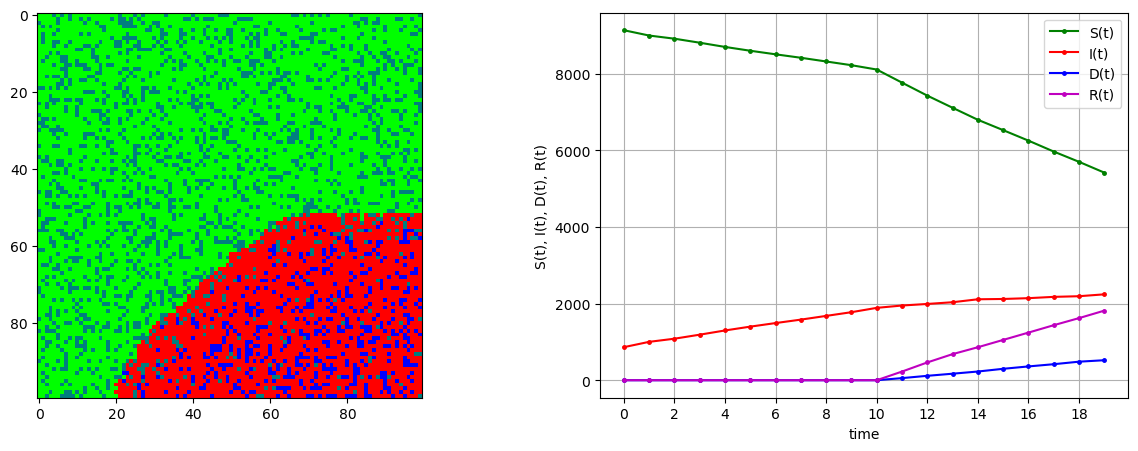

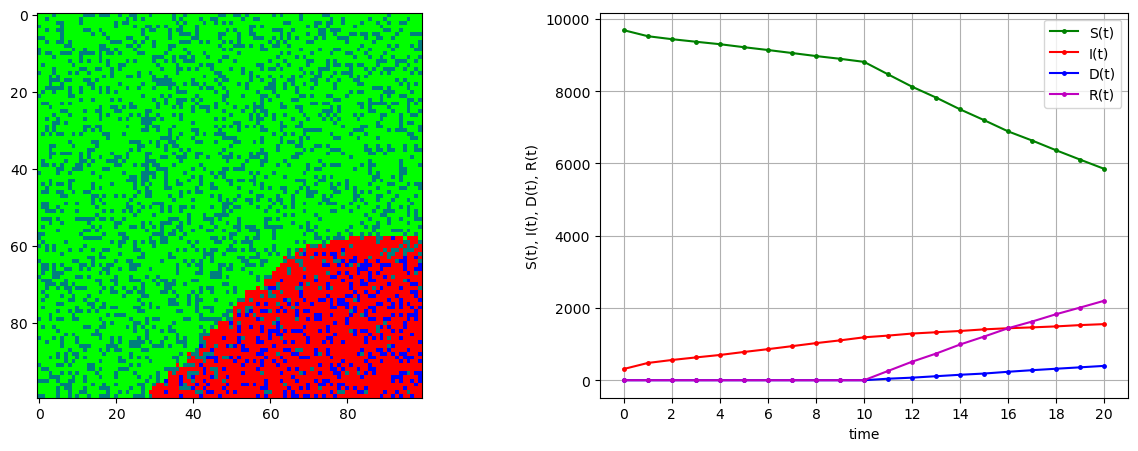

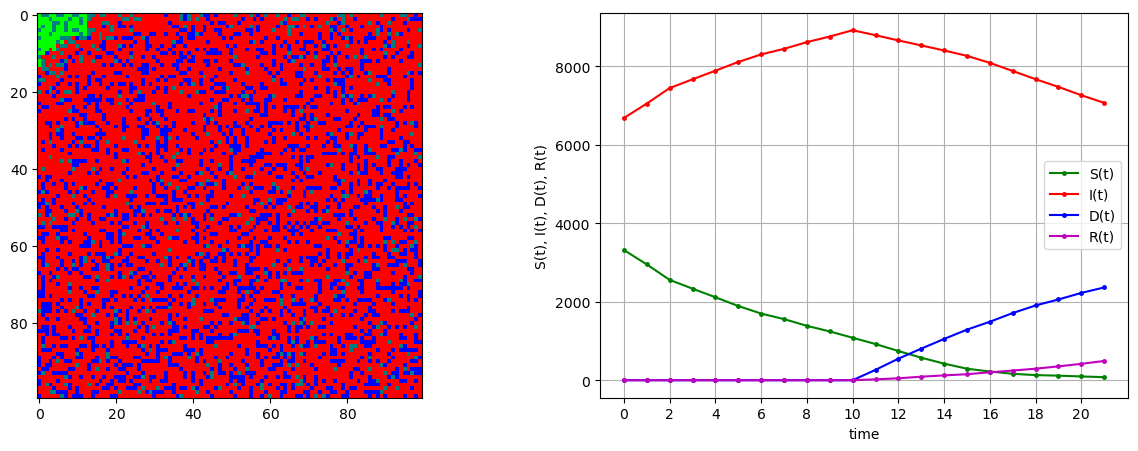

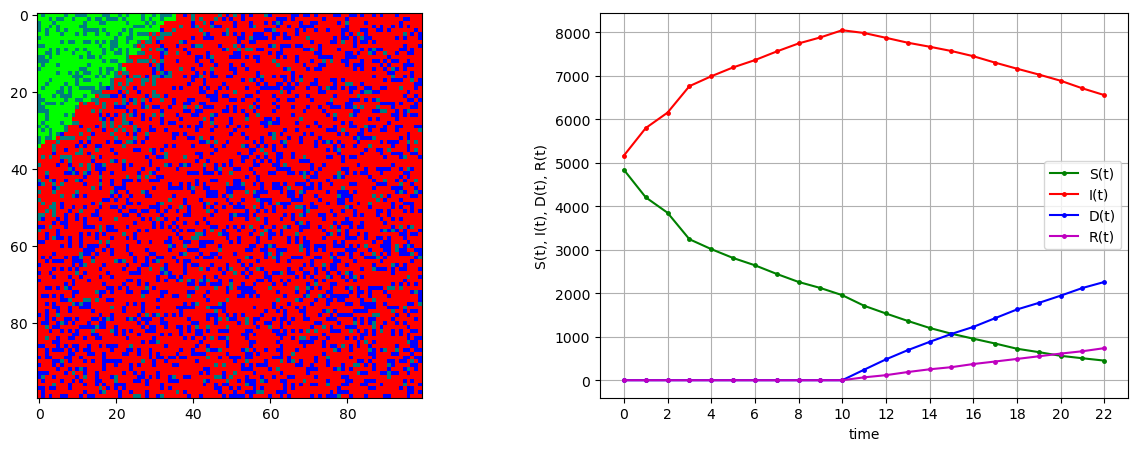

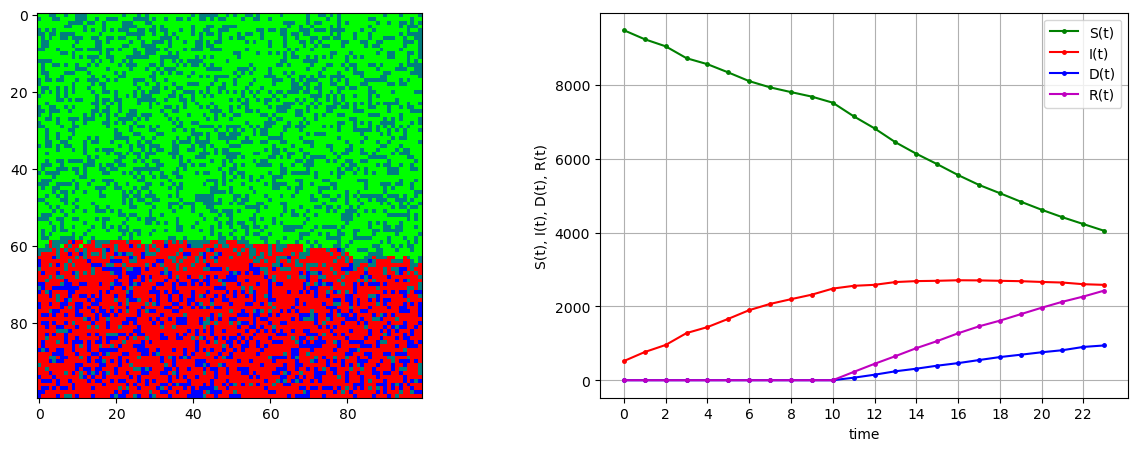

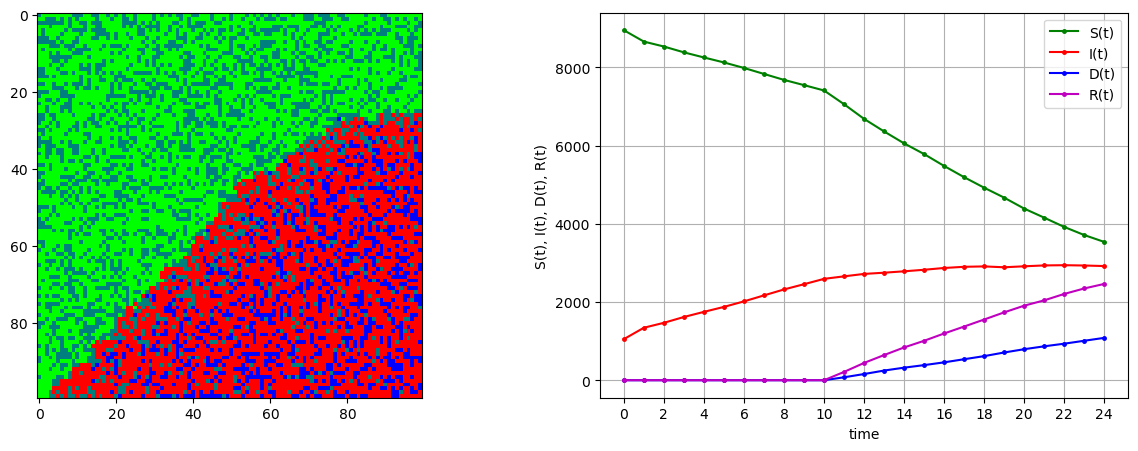

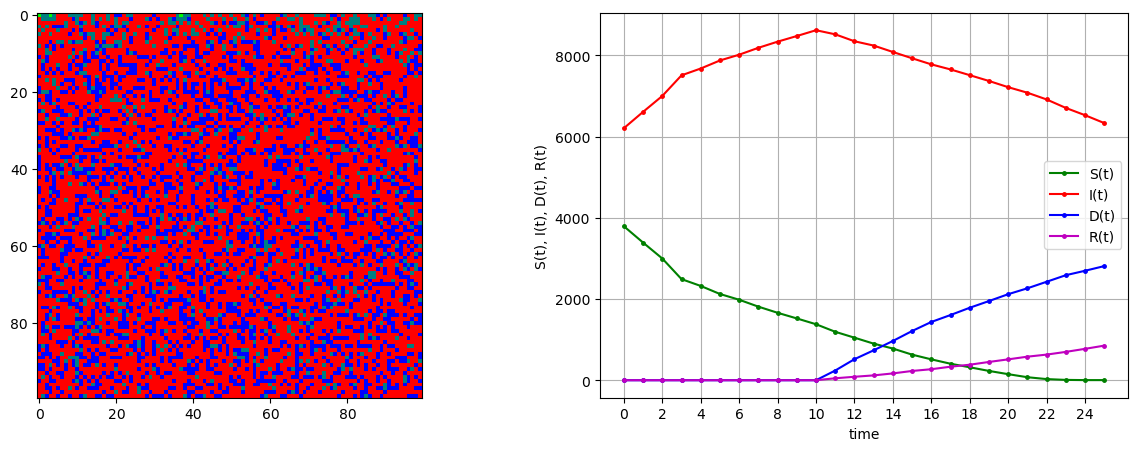

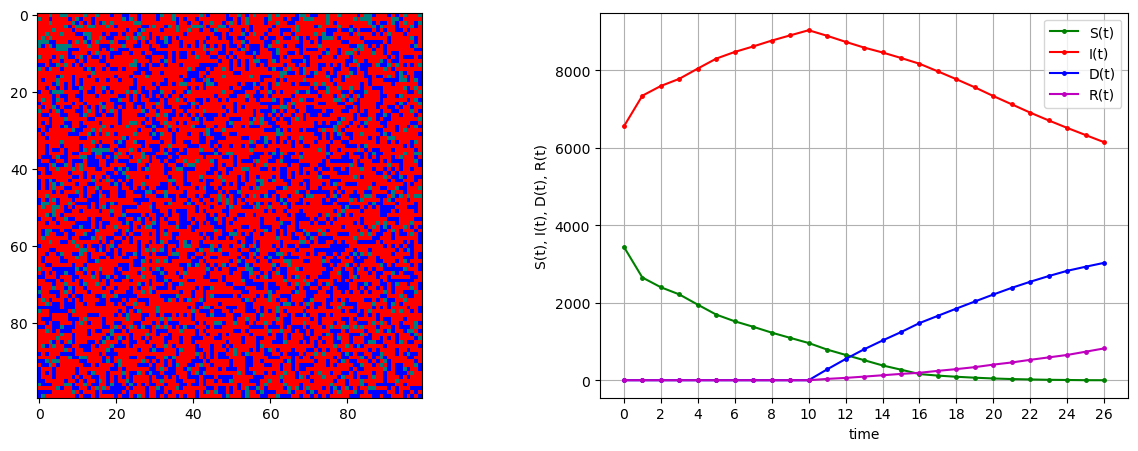

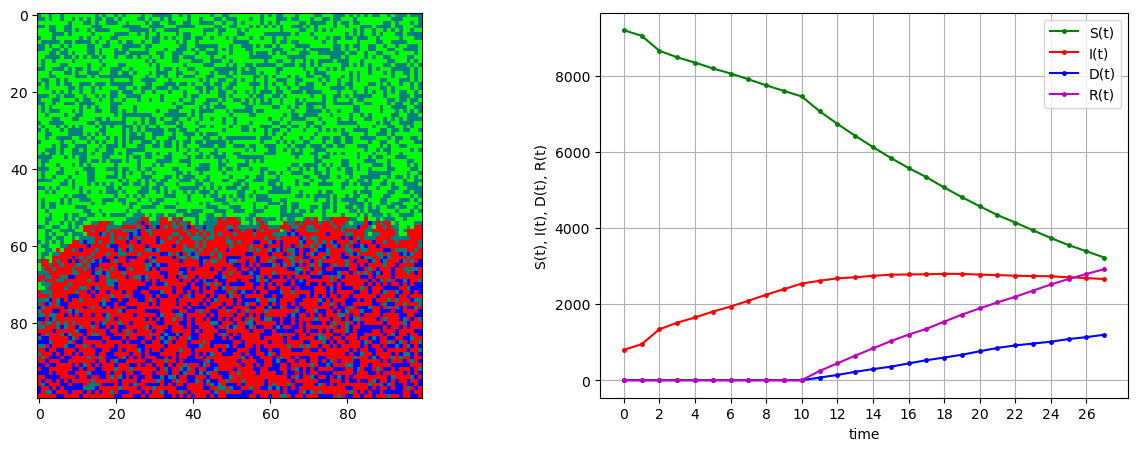

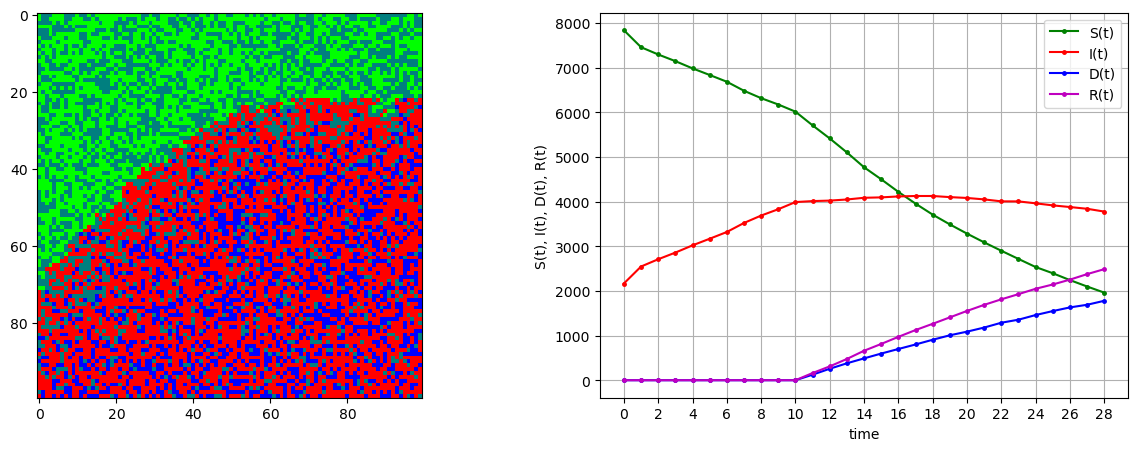

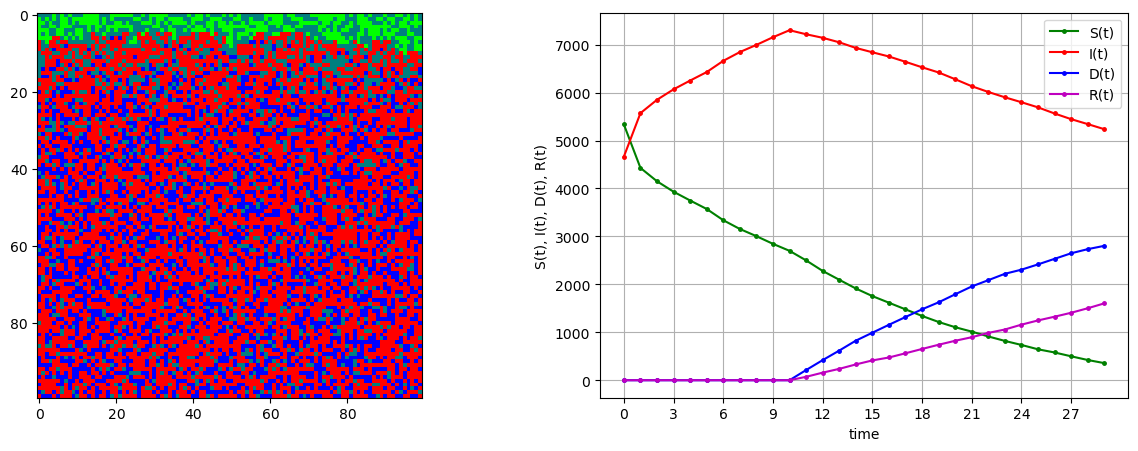

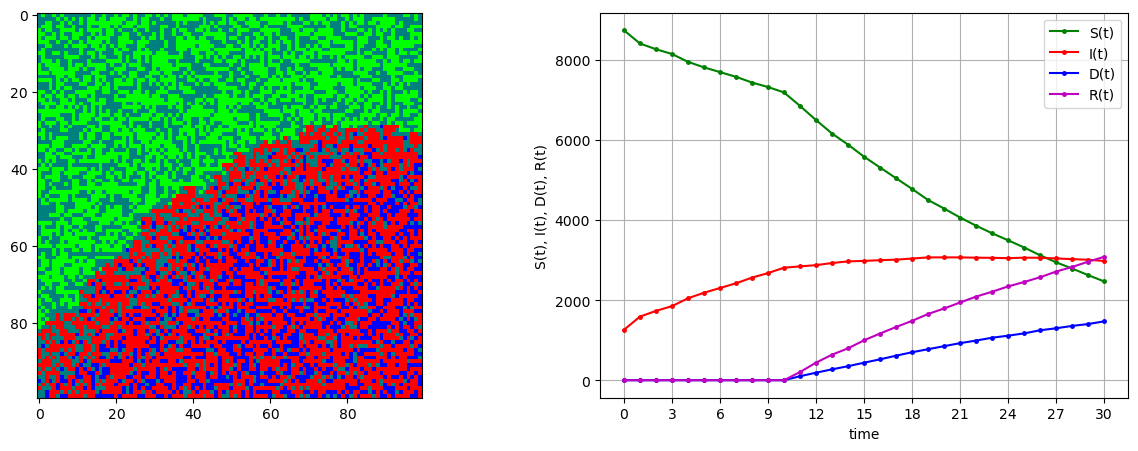

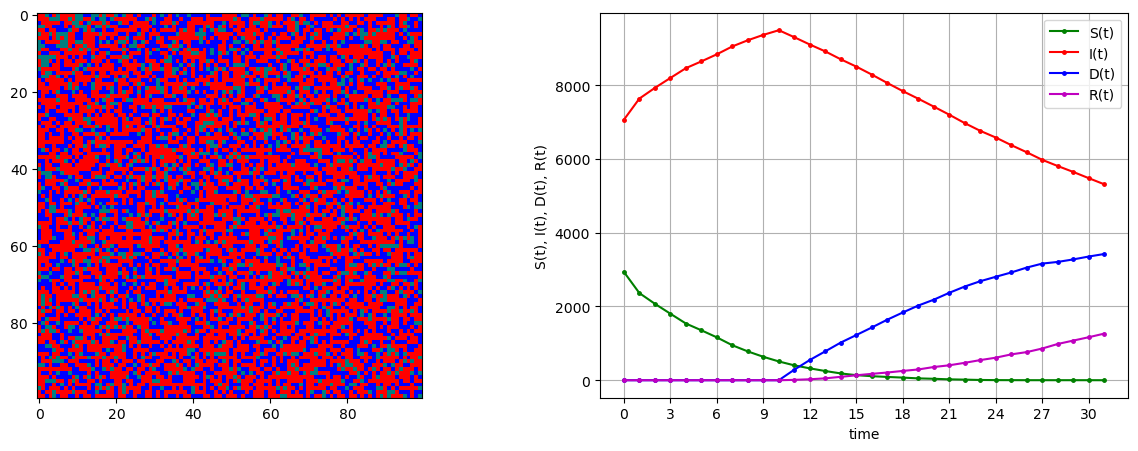

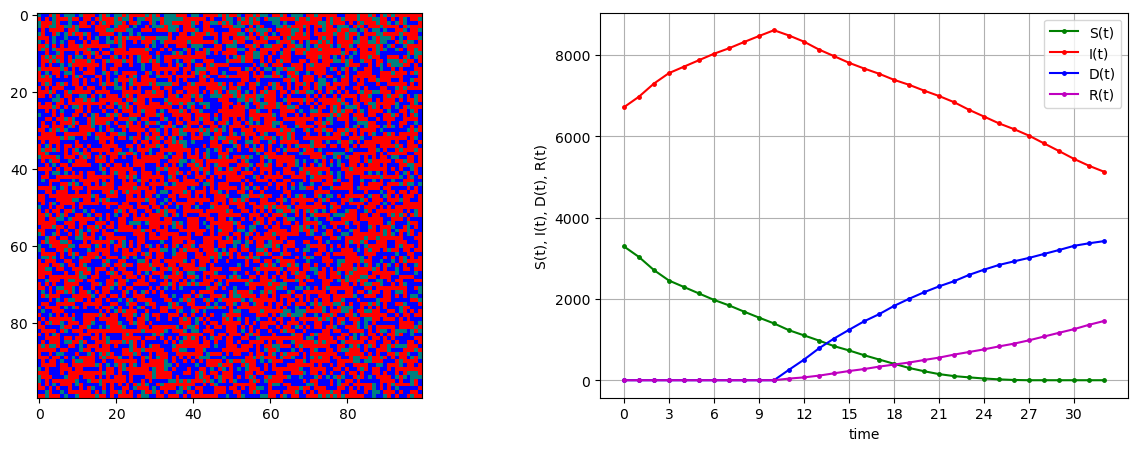

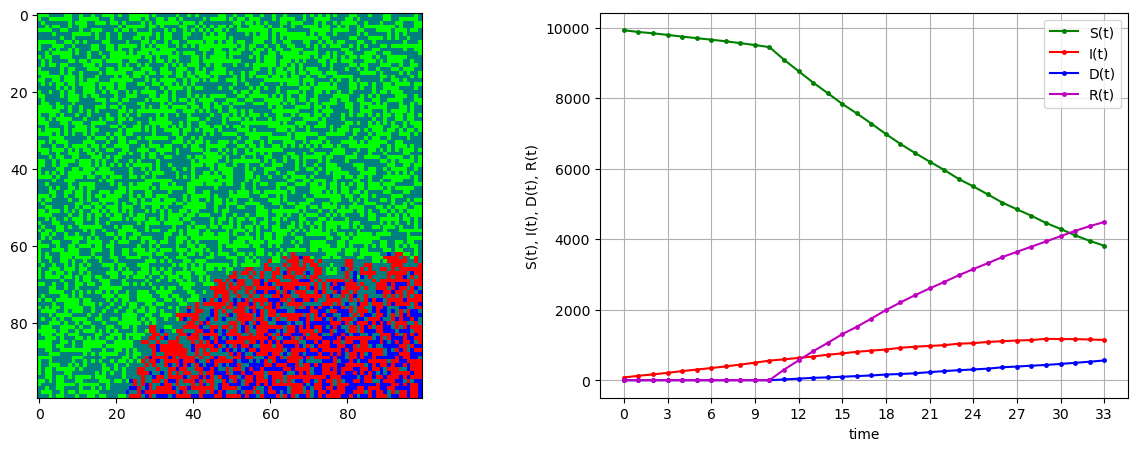

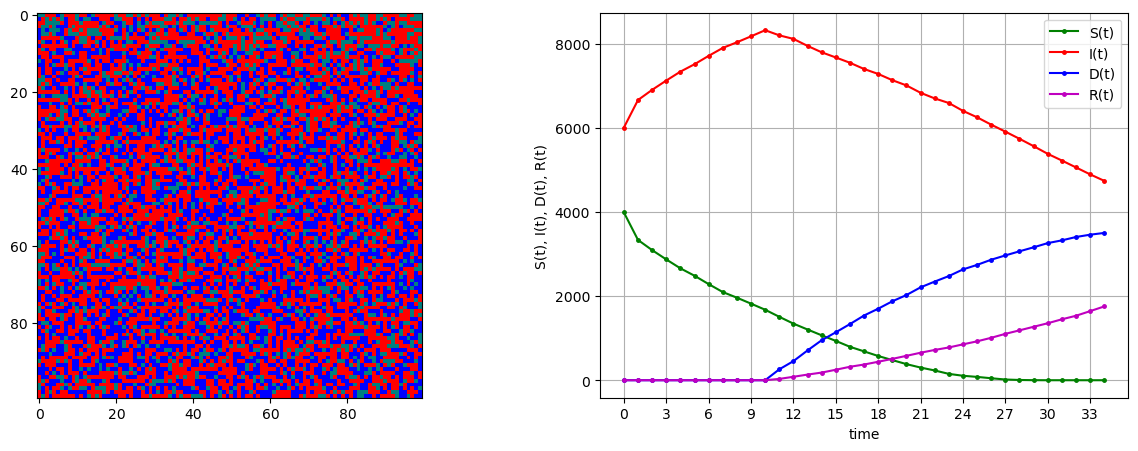

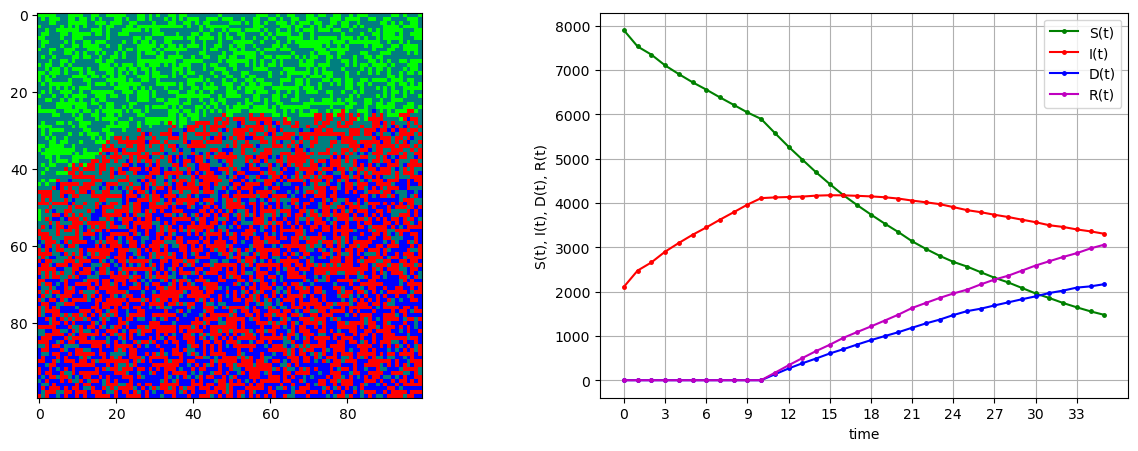

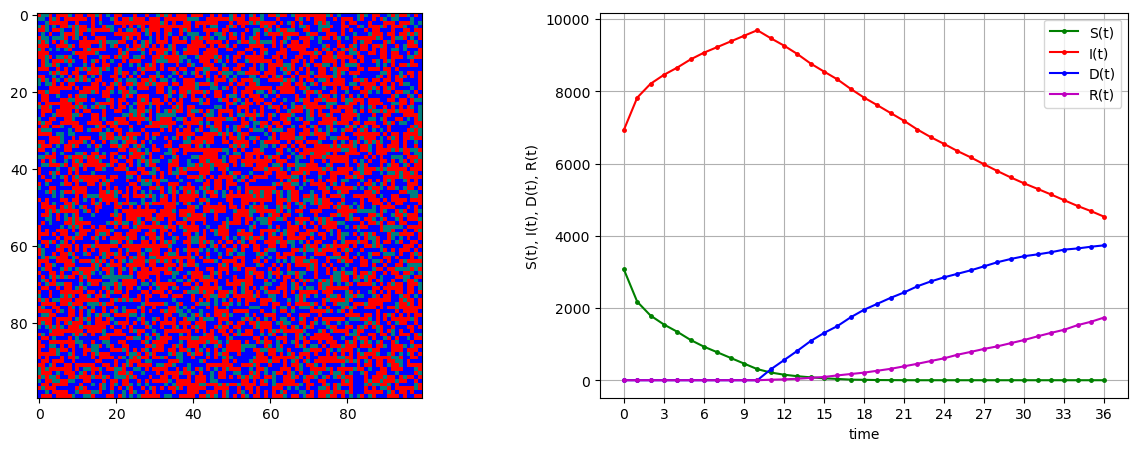

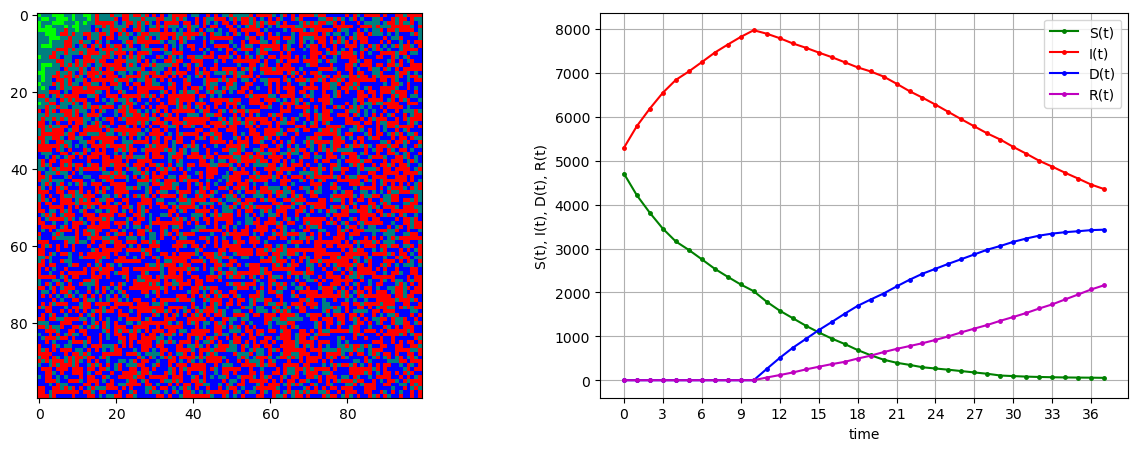

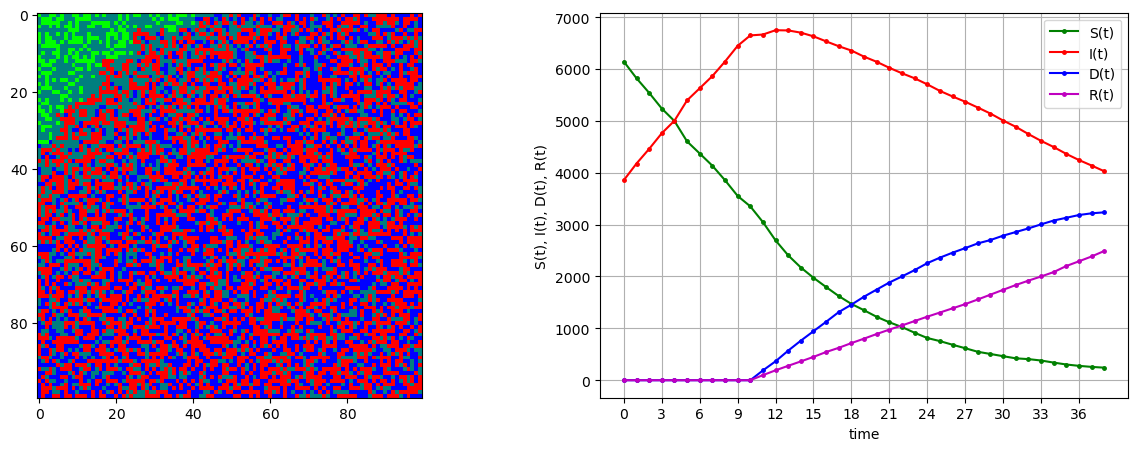

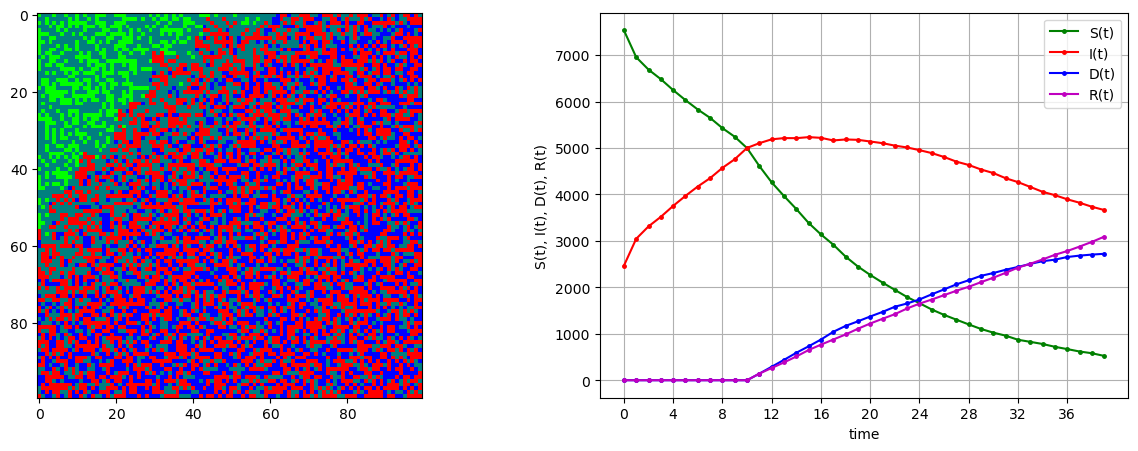

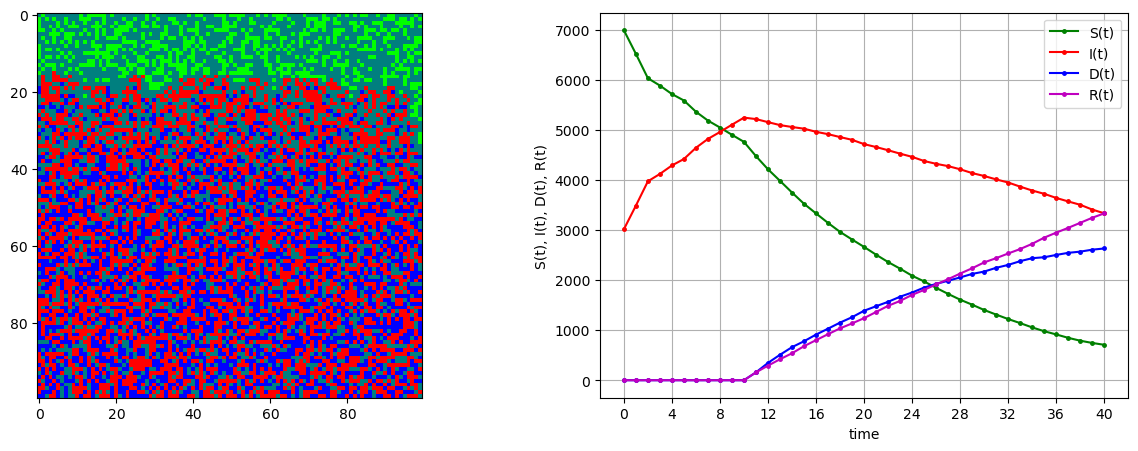

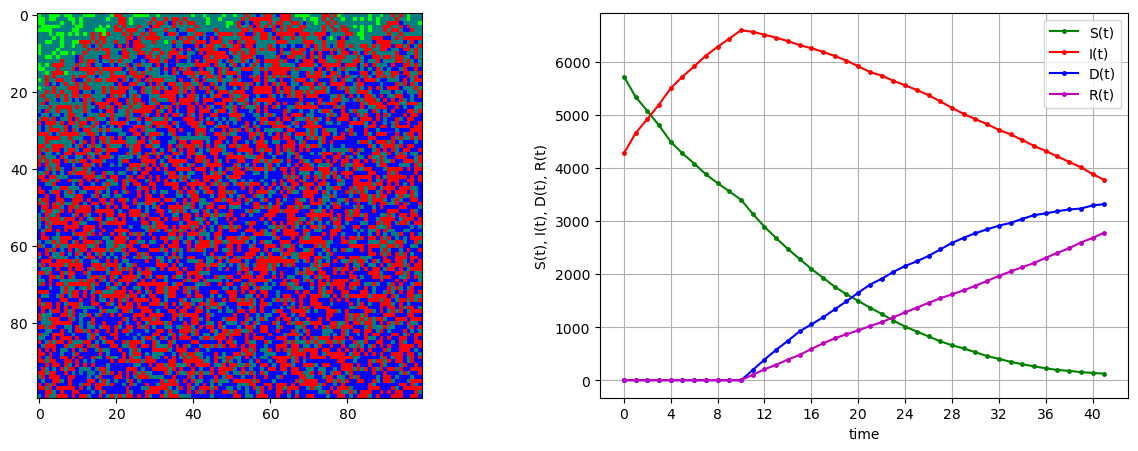

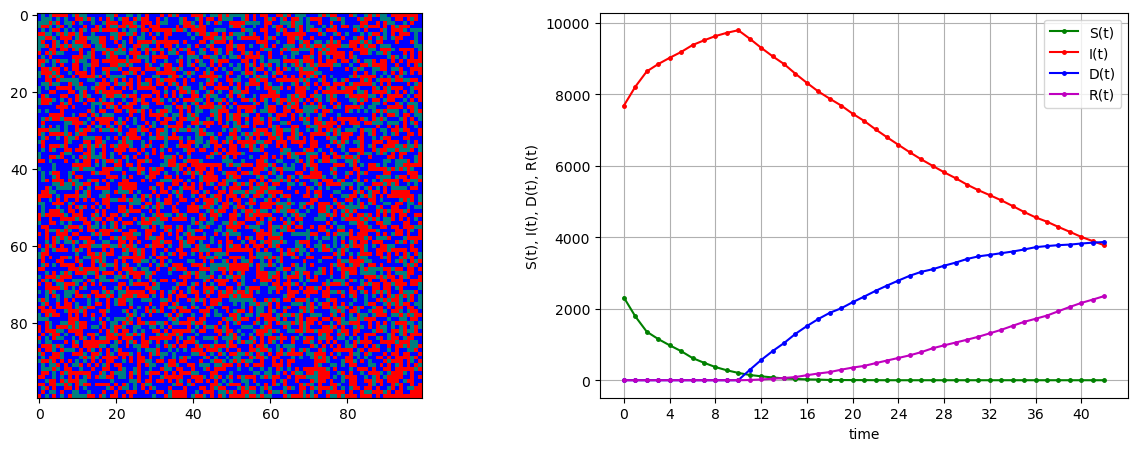

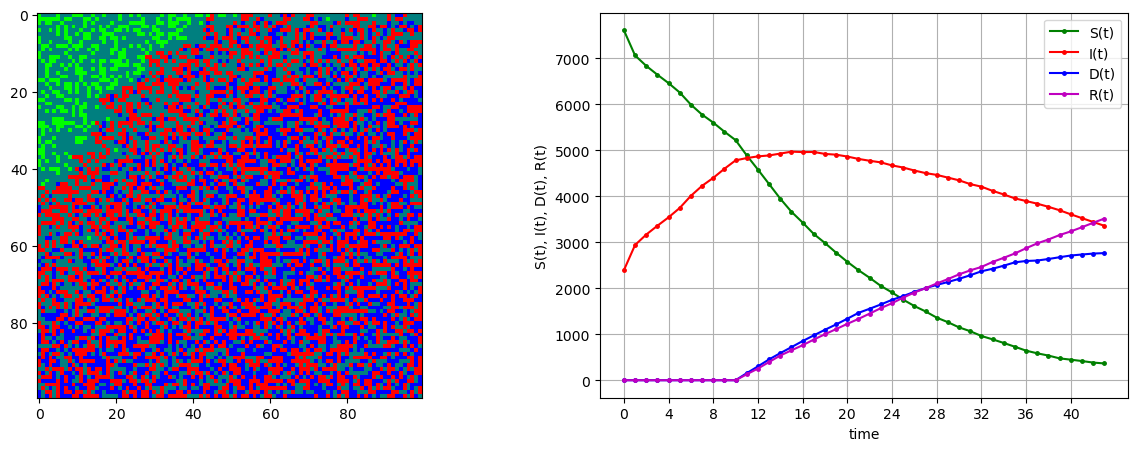

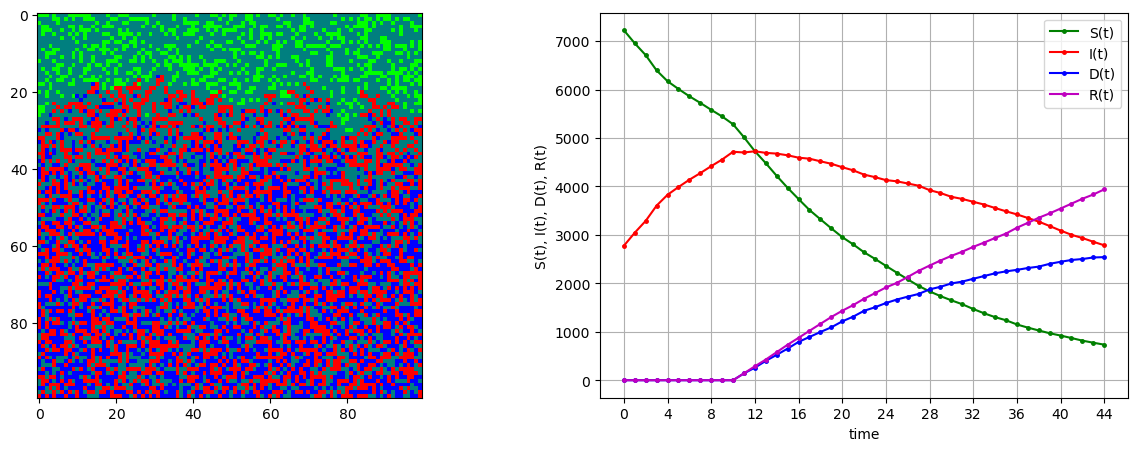

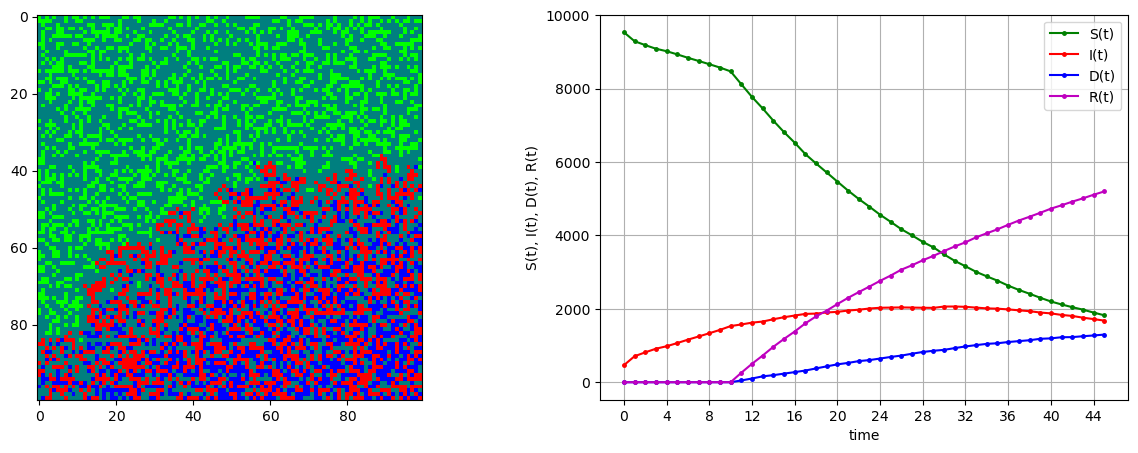

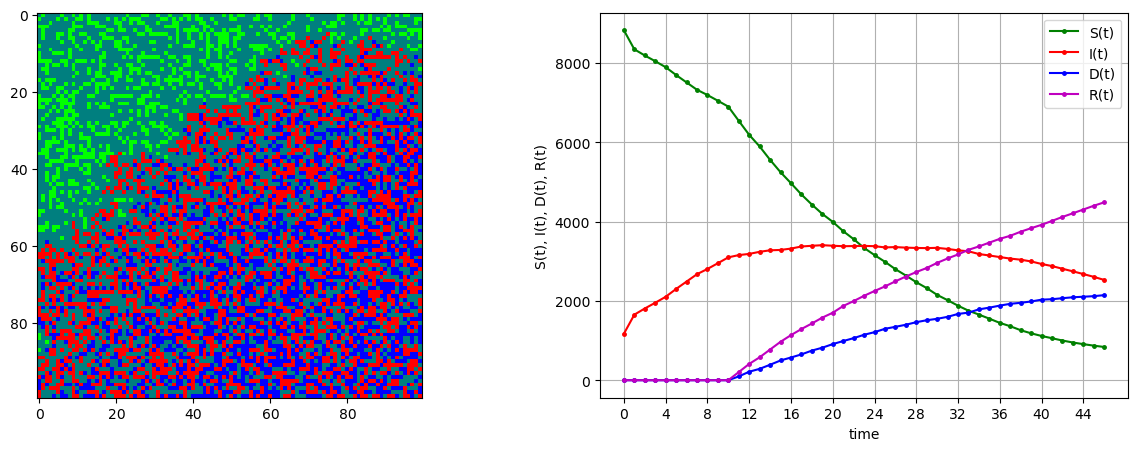

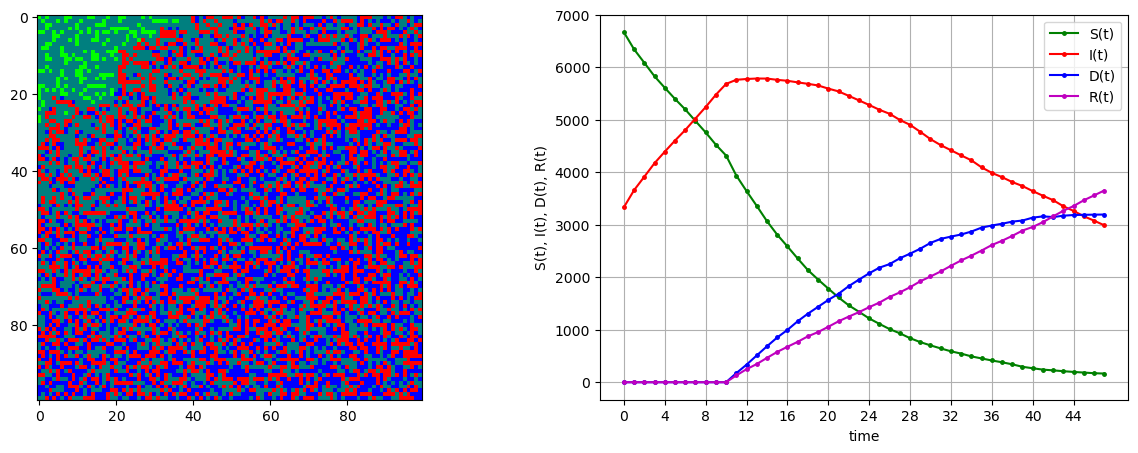

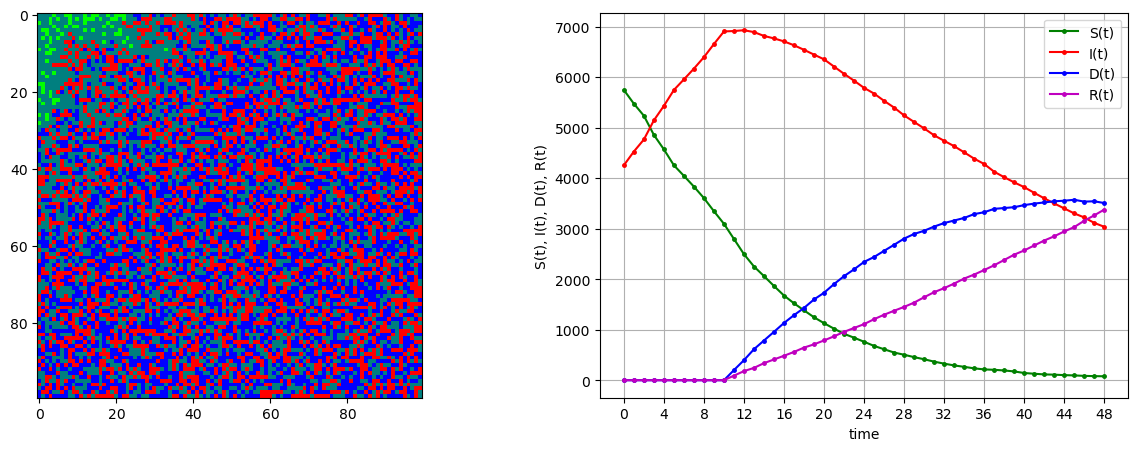

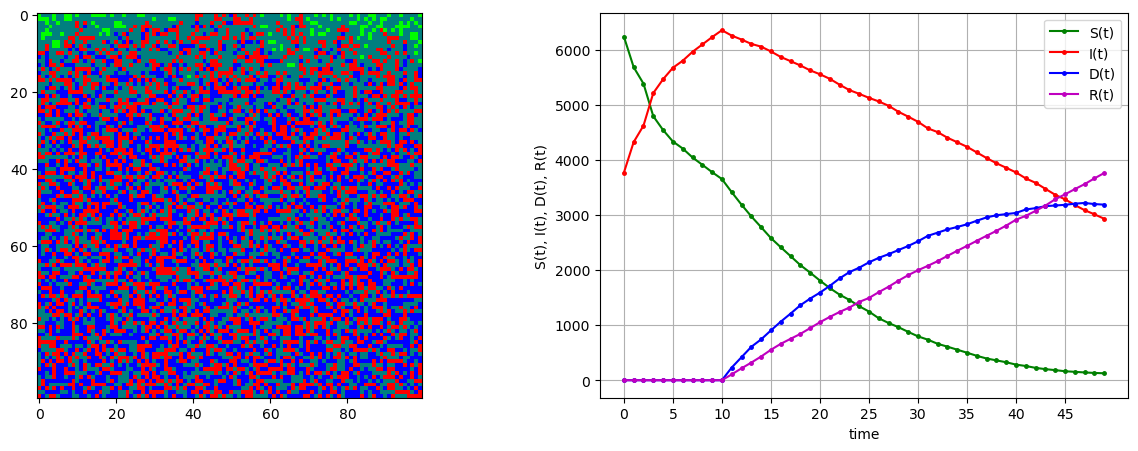

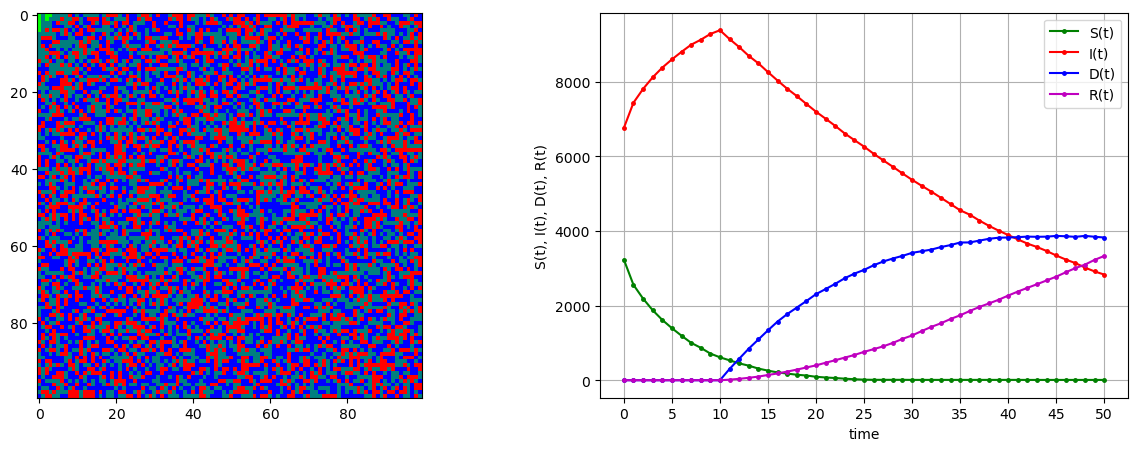

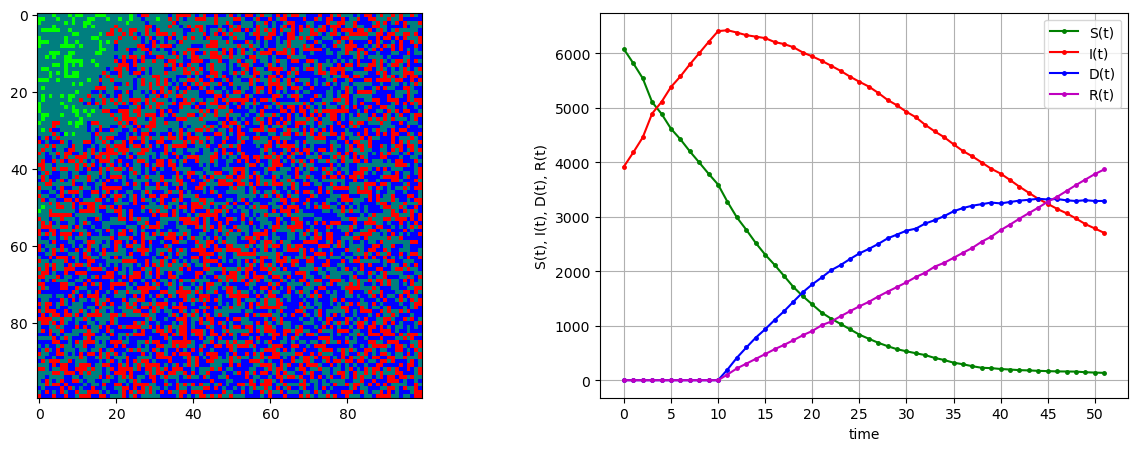

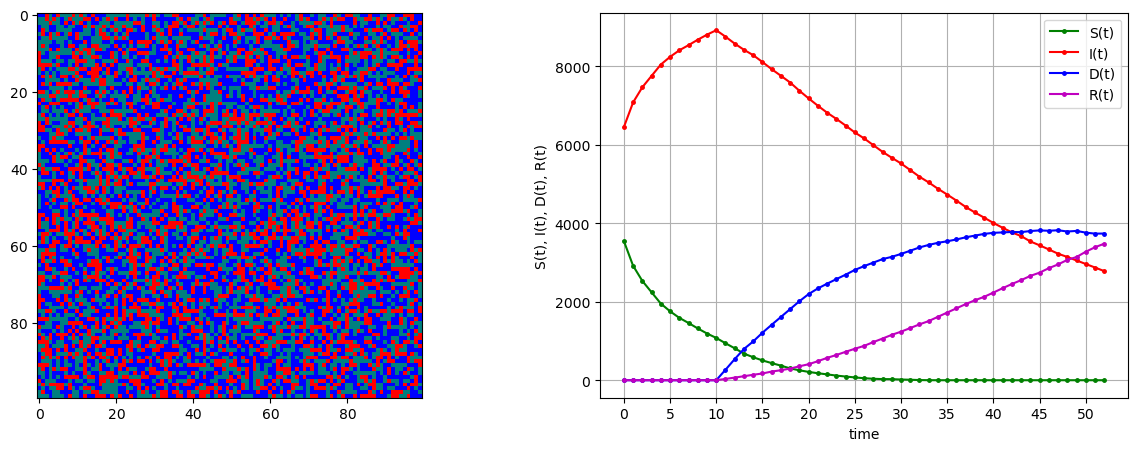

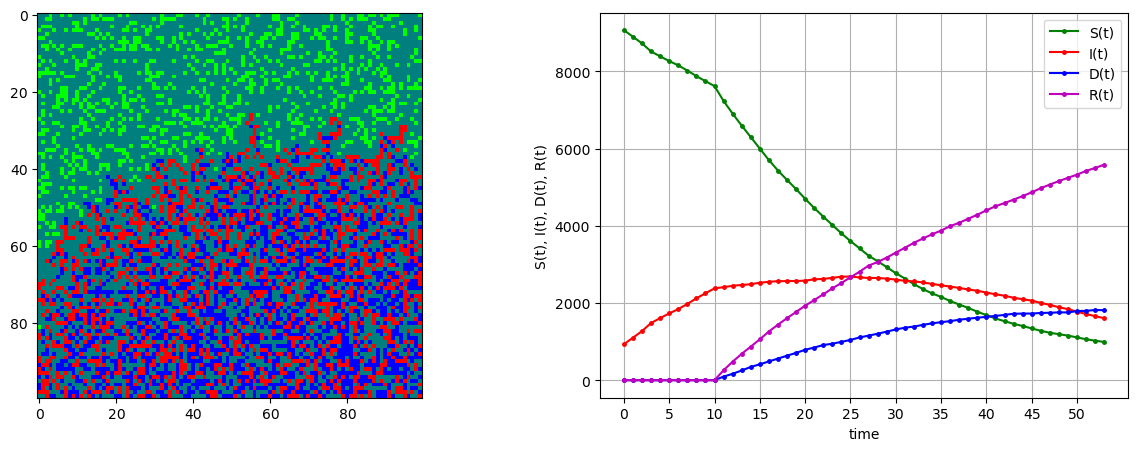

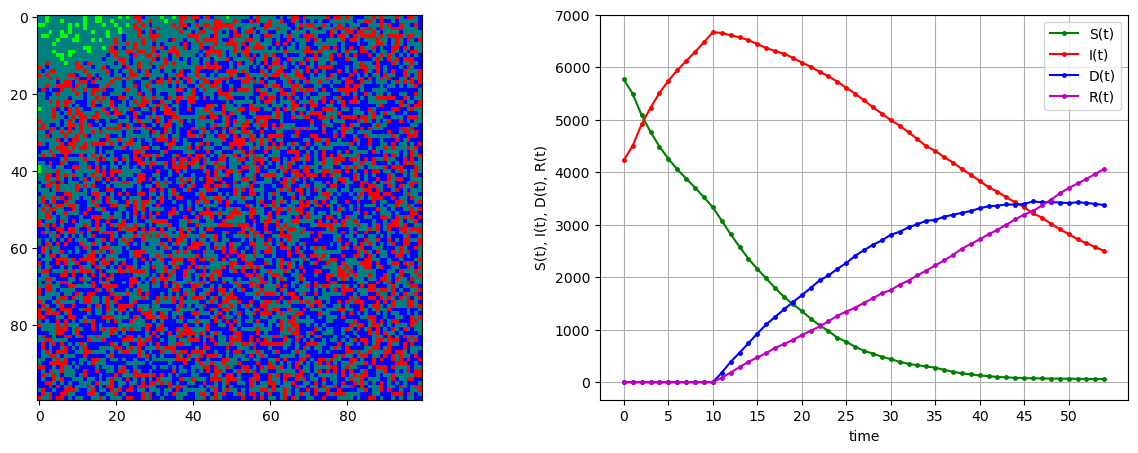

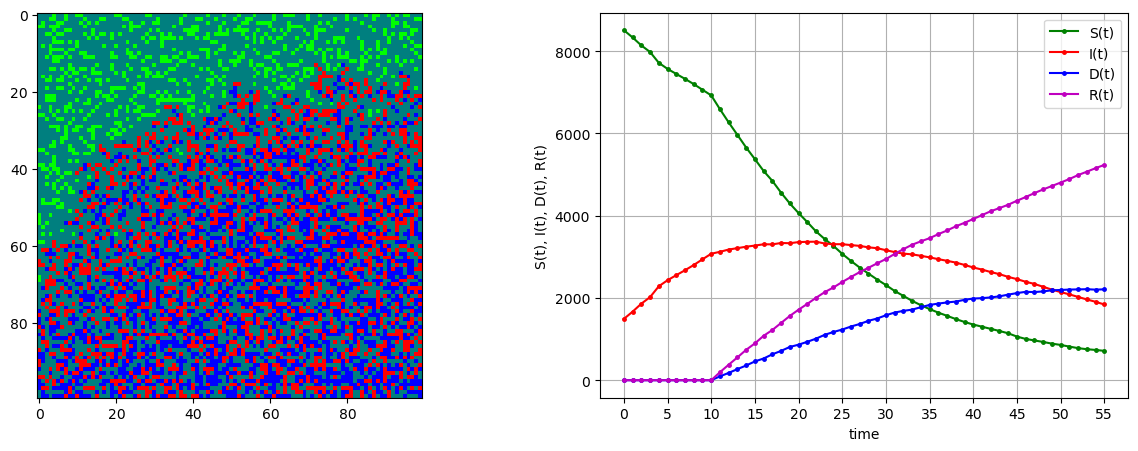

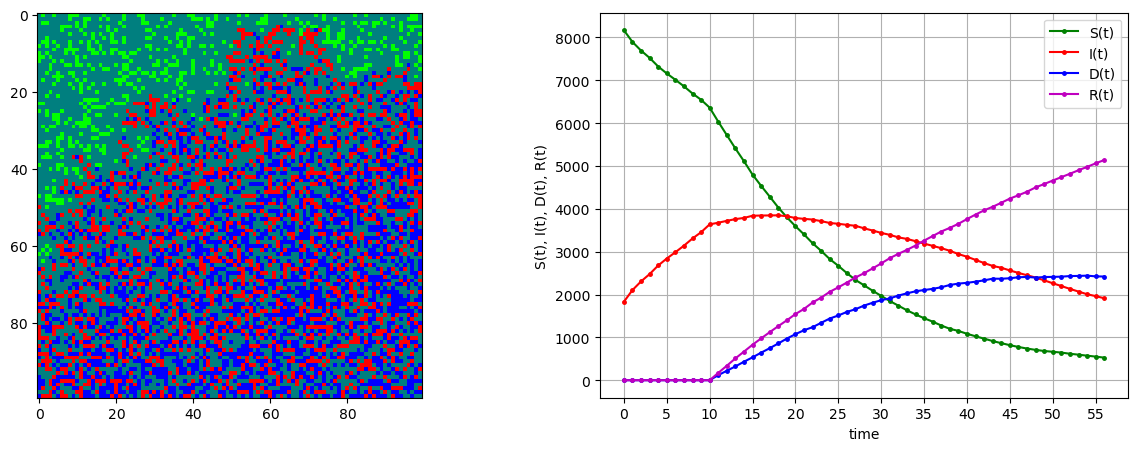

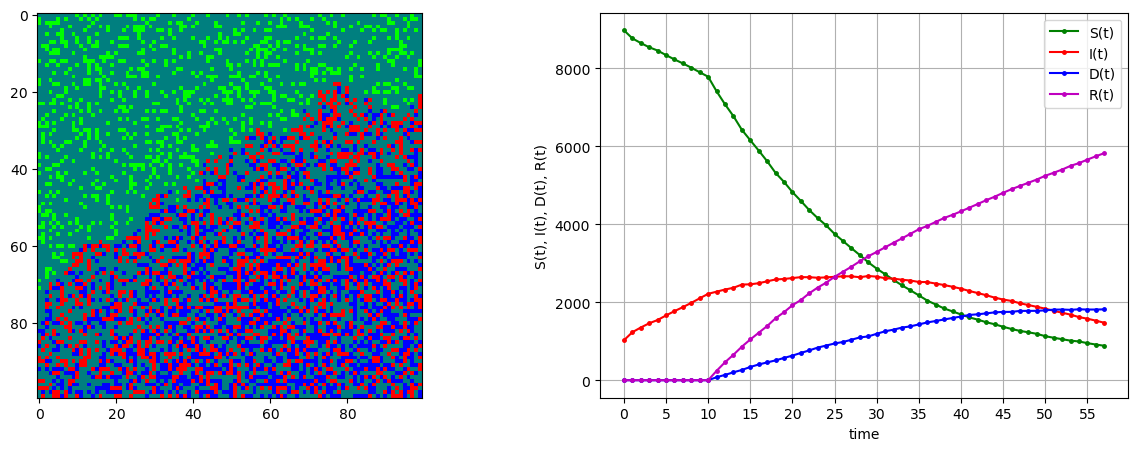

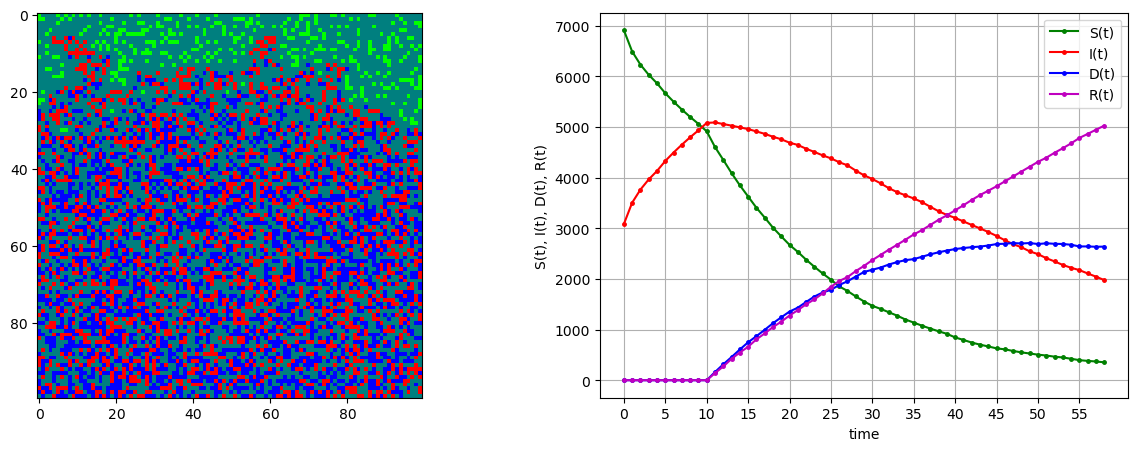

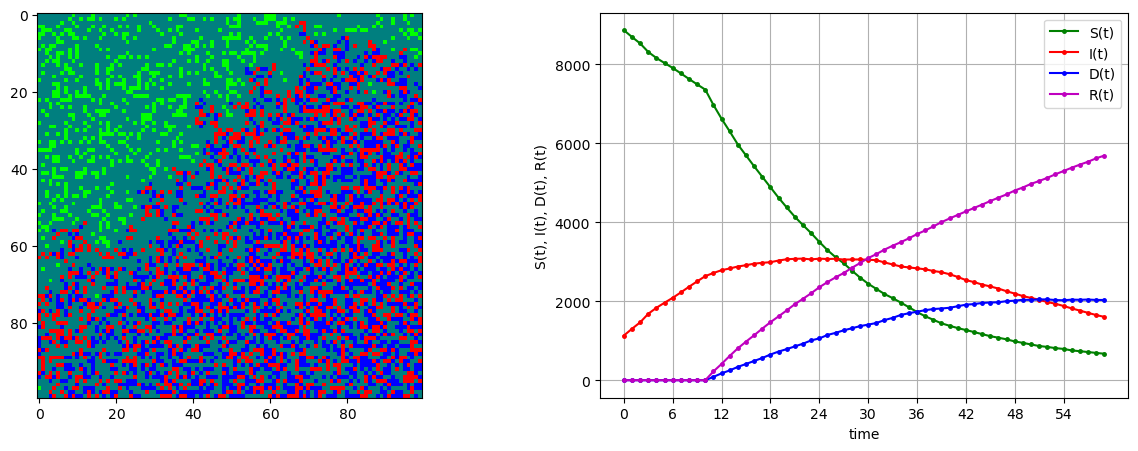

In [ ]:
for i in range(10, 200, 1):
    m, n = 100, 100
    Beta, Mu, Delta = 0.65, 0.03, 0.028
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    AlgoStochPSIDR(axs, t_bound=10, MaxTime=i, I0=1, D0=0, R0=0)
    plt.show()

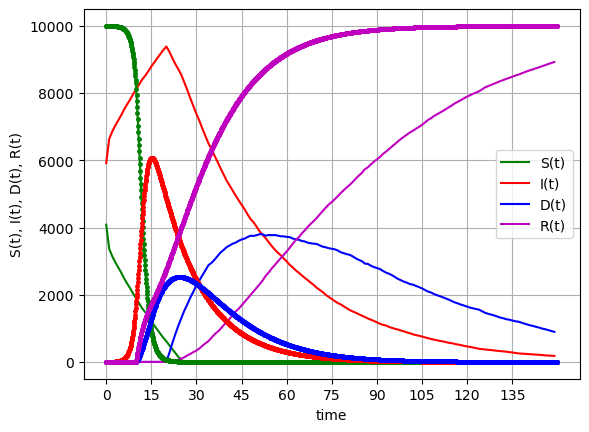

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def AlgoStochPSIDR(h, t_bound, MaxTime, I0, D0, R0):
    global m, n, Beta, Mu, Delta
    M, N = m, n
    status_old = np.zeros((M, N))

    countI = 0
    while countI < I0:
        i, j = np.random.randint(M), np.random.randint(N)
        if status_old[i, j] == 0:
            status_old[i, j] = 1
            countI += 1

    countD = 0
    while countD < D0:
        i, j = np.random.randint(M), np.random.randint(N)
        if status_old[i, j] == 0:
            status_old[i, j] = 2
            countD += 1

    countR = 0
    while countR < R0:
        i, j = np.random.randint(M), np.random.randint(N)
        if status_old[i, j] == 0:
            status_old[i, j] = 3
            countR += 1

    status_new = status_old
    T = np.zeros(MaxTime)
    S, I, D, R = np.zeros(MaxTime), np.zeros(MaxTime), np.zeros(MaxTime), np.zeros(MaxTime)
    Pic = np.ones((M, N, 3))

    for time in range(MaxTime):
        T[time] = time
        for i in range(M):
            for j in range(N):
                if status_old[i, j] == 1:
                    for i1 in range(max(0, i-1), min(M, i+2)):
                        for j1 in range(max(0, j-1), min(N, j+2)):
                            if i1 != i or j1 != j:
                                i1_adj = (i1 + M) % M  
                                j1_adj = (j1 + N) % N
                                if np.random.rand() < Beta and status_new[i1_adj, j1_adj] == 0:
                                    status_new[i1_adj, j1_adj] = 1

        if T[time] > t_bound:
            for i in range(M):
                for j in range(N):
                    if status_new[i, j] == 1 and np.random.rand() < Mu:
                        status_new[i, j] = 2
                    elif status_new[i, j] == 2 and np.random.rand() < Delta:
                        status_new[i, j] = 3
                    elif status_new[i, j] == 0 and np.random.rand() < Mu:
                        status_new[i, j] = 3

        for i in range(M):
            for j in range(N):
                if status_new[i, j] == 1:
                    Pic[i, j, :] = [1, 0, 0]
                elif status_new[i, j] == 2:
                    Pic[i, j, :] = [0, 0, 1]
                elif status_new[i, j] == 3:
                    Pic[i, j, :] = [0, 0.5, 0.5]
                else:
                    Pic[i, j, :] = [0, 1, 0]

        S[time] = np.sum(status_old == 0)
        I[time] = np.sum(status_old == 1)
        D[time] = np.sum(status_old == 2)
        R[time] = np.sum(status_old == 3)

        status_old = status_new

    sol = np.column_stack((S, I, D, R))
    plotPoint(h, T, sol)

def plotPoint(h, t, sol):
    s = ['g', 'r', 'b', 'm']
    labels = ['S(t)', 'I(t)', 'D(t)', 'R(t)']

    for i in range(len(s)):
        plt.plot(t, sol[:, i], s[i], markersize=5)

    plt.legend(labels)
    plt.xlabel('time')
    plt.ylabel('S(t), I(t), D(t), R(t)')
    plt.xticks(t[::len(t) // 10])
    plt.grid(True)

m, n = 100, 100
Beta, Mu, Delta = 0.65, 0.03, 0.028
AlgoStochPSIDR(axs, t_bound=20, MaxTime=150, I0=1, D0=0, R0=0)

kernel(h, beta=8e-5, delta=0.1, mu=7e-2,
       t_bound=10, t_total=150,
       S0=9999, I0=1,
       D0=0, R0=0, dt=0.1)

plt.show()